<a href="https://colab.research.google.com/github/xuziyue/tensorflow-models/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
!pip install -U tensorflow_datasets

Requirement already up-to-date: tensorflow_datasets in /usr/local/lib/python3.7/dist-packages (4.3.0)


In [33]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
import tensorflow_datasets as tfds
from absl import logging
logging.set_verbosity(logging.ERROR)

In [34]:
import math
import numpy as np
import matplotlib.pyplot as plt

import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm
print(tf.__version__)

2.5.0


In [35]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [36]:
class_names = metadata.features['label'].names
print("Class names: {}".format(class_names))

Class names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [37]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples

In [38]:
def normalize(image, labels):
  images = tf.cast(image, tf.float32)
  images /= 255
  return images, labels

In [39]:
 for image, label in test_dataset.take(1):
   break
image = image.numpy().reshape((28, 28))

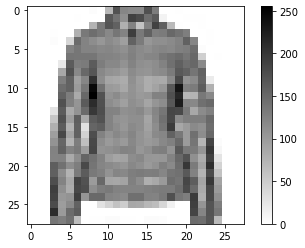

In [40]:
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

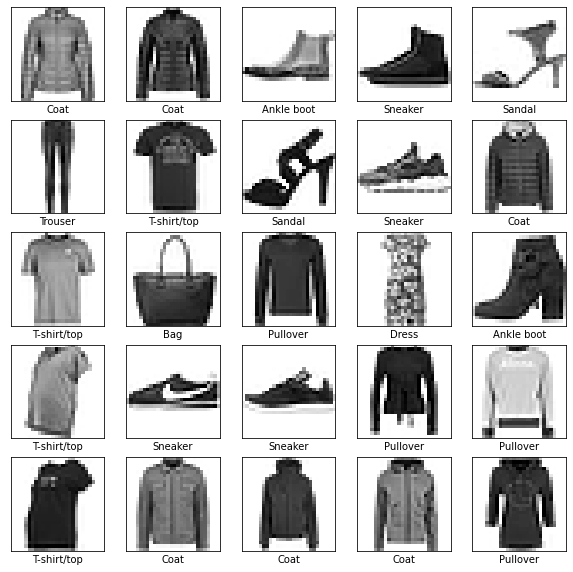

In [41]:
plt.figure(figsize=(10, 10))
i = 0
for (image, label) in test_dataset.take(25):
  image = image.numpy().reshape((28, 28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image, cmap=plt.cm.binary)
  plt.xlabel(class_names[label])
  i += 1
plt.show()

In [42]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28,28,1)),
                             tf.keras.layers.Dense(128, activation=tf.nn.relu),
                             tf.keras.layers.Dense(128, activation=tf.nn.relu),
                             tf.keras.layers.Dense(10, activation=tf.nn.softmax)
                             ])

In [43]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [44]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [45]:
model.fit(train_dataset, epochs=8, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/8
1875/1875 [==============================] - 7s 2ms/step - loss: 1.9104 - accuracy: 0.7518
Epoch 2/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6282 - accuracy: 0.8014
Epoch 3/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5713 - accuracy: 0.8123
Epoch 4/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5038 - accuracy: 0.8299
Epoch 5/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4801 - accuracy: 0.8351
Epoch 6/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4280 - accuracy: 0.8504
Epoch 7/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4131 - accuracy: 0.8534
Epoch 8/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3948 - accuracy: 0.8590


In [46]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/BATCH_SIZE))

313/313 [==============================] - 1s 3ms/step - loss: 0.4349 - accuracy: 0.8511


In [47]:
test_accuracy

0.8511000275611877

In [48]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [49]:
predictions.shape

(32, 10)

In [50]:
predictions[0]

array([2.8078101e-05, 8.9621977e-08, 3.2837652e-02, 9.5366224e-05,
       9.4842899e-01, 4.9350920e-13, 1.8599132e-02, 4.1756887e-22,
       1.0694795e-05, 1.3224233e-12], dtype=float32)

In [51]:
class_names[np.argmax(predictions[0])]

'Coat'

In [52]:
class_names[test_labels[0]]

'Coat'

In [53]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

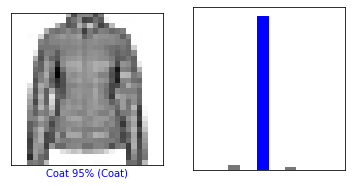

In [54]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

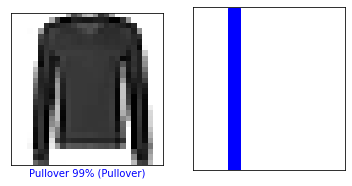

In [55]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

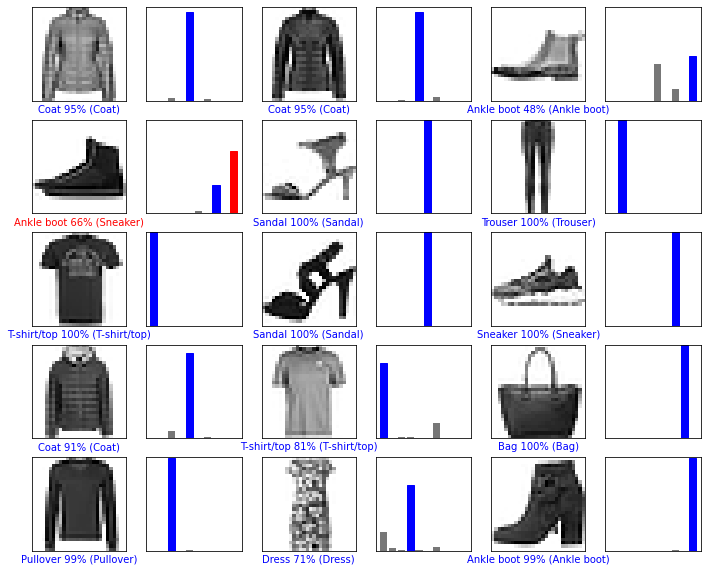

In [56]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [57]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28, 1)


In [58]:
# Add the image to a batch where it's the only member.
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [59]:
predictions_single = model.predict(img)

print(predictions_single)

[[2.8078130e-05 8.9622141e-08 3.2837667e-02 9.5366311e-05 9.4842899e-01
  4.9350920e-13 1.8599132e-02 4.1757046e-22 1.0694795e-05 1.3224284e-12]]


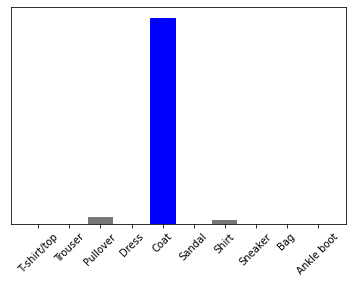

In [60]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [61]:
np.argmax(predictions_single[0])

4

# Exercises

Experiment with different models and see how the accuracy results differ. In particular change the following parameters:
*   Set training epochs set to 1
*   Number of neurons in the Dense layer following the Flatten one. For example, go really low (e.g. 10) in ranges up to 512 and see how accuracy changes
*   Add additional Dense layers between the Flatten and the final `Dense(10)`, experiment with different units in these layers
*   Don't normalize the pixel values, and see the effect that has


Remember to enable GPU to make everything run faster (Runtime -> Change runtime type -> Hardware accelerator -> GPU).
Also, if you run into trouble, simply reset the entire environment and start from the beginning:
*   Edit -> Clear all outputs
*   Runtime -> Reset all runtimes